# Tutorial EVN calibration

This is a first draft to translate the EVN calibration steps into a Jupyter notebook. The steps are taken from the tutorial developed by Minnie Mao, Des Small, Jack Radcliffe and many others. 

The original version of Des's tutorial is http://jive.nl/~small/FringeFitting/n14c3_tutorial.html

The version of Jack is part 1 of the EVN continuum DARA tutorials: http://www.jb.man.ac.uk/DARA/unit4/Workshops/EVN_continuum.html

The data for this docker container are linked into the virtual drive /data

The dataset is n14c3_original.ms, the same as used in the tutorials. The directory also contains the flag file in CASA readable format, and the gain curve calibration table n14c3.gc. The system temperature information has been added to the MS using the scripts from Mark Kettenis.

## Parameters for the N14C3 run

Some of these parameters have to be taken from the listobs file. The 'intent' field in the MS can be used to get some 
of these values, but the scan for SBD fringe fit is always a bit tricky. It could be the same scan as the bandpass calibration.

In [1]:
obsid = 'n14c3'

#Reference antenna
refant = 'EF'

#Calibration sources and scans
sbdscan = '37'
sbdtimer = '13:18:00~13:20:00'
mbdfield = '1848+283,J1640+3946'
bpassfield = '1848+283'

#######
# No changes needed below
#######

import glob
import shutil

mypath='/home/jupyter/data/'
sys.path.append(mypath)

#Visibility data
idifiles = sorted(glob.glob(mypath+'*.IDI*'))
vis = mypath+obsid+'.ms'

print 'As cross-check for the path show which IDI files are used:'
print idifiles

#EVN archival calibration tables
AIPSflag = mypath+obsid+'.uvflg'
gcfile = mypath+'EVN.gc'
antabfile = mypath+obsid+'.antab'

#CASA calibration tables
gcaltab = mypath+obsid+'.gcal'
tsystab = mypath+obsid+'.tsys'
sbdtab = mypath+obsid+'.sbd'
mbdtab = mypath+obsid+'.mbd'
bpasstab = mypath+obsid+'.bpass'
flagtab = mypath+obsid+'.flag'

listobsfile = mypath+obsid+'.listobs'

['/home/jupyter/data/n14c3_1_1.IDI1', '/home/jupyter/data/n14c3_1_1.IDI2']


# Precalibration steps
These steps are done to ensure the meta-data associated with the observation is properly handled by CASA

In [2]:
# Append the system temperature to the FITS-IDI files

# Local imports 
import astropy.io.fits as pyfits
from casavlbitools import fitsidi

# Check if the IDI files have a TSYS column, if not, add one
try:
    hdulist = pyfits.open(idifiles[0])
    hdu = hdulist['SYSTEM_TEMPERATURE']
    print 'TSYS table already present, skipping the append step'
except KeyError:
    print 'Appending TSYS, this takes some time, go for a walk'
    fitsidi.append_tsys(antabfile, idifiles)

TSYS table already present, skipping the append step


In [3]:
from casavlbitools import fitsidi
fitsidi.convert_flags(AIPSflag,idifiles,outfile=flagtab)

In [4]:
from casavlbitools import casa as mdconvert
if os.path.isdir(gcfile)==False:
    mdconvert.convert_gaincurve(antabfile,gcfile)
else:
    print "GC conversion already done."

Import step for the IDI files, eventually this tutorial should start with the MS file. The IDI-files have been prepped by adding the Tsys values to the files, and the gaincurve has been written to a file that CASA can read.

In [5]:
#Verify if MS exist, otherwise do importstep
if os.path.isdir(vis)==False:
    importfitsidi(fitsidifile= idifiles, vis = vis, constobsid=True, scanreindexgap_s=15.0, specframe='GEO')
else:
    print "Import already done, clearing calibration and flags"
    clearcal(vis)
    flagmanager(vis=vis,mode='restore',versionname='no_flags')

Show log 2020-11-02 21:50:32	INFO	importfitsidi::::	
 2020-11-02 21:50:32	INFO	importfitsidi::::+	##########################################
 2020-11-02 21:50:32	INFO	importfitsidi::::+	##### Begin Task: importfitsidi #####
 2020-11-02 21:50:32	INFO	importfitsidi::::	importfitsidi(fitsidifile=['/home/jupyter/data/n14c3_1_1.IDI1', '/home/jupyter/data/n14c3_1_1.IDI2'],vis="/home/jupyter/data/n14c3.ms",constobsid=True,scanreindexgap_s=15.0,specframe="GEO")
 2020-11-02 21:50:32	INFO	importfitsidi::::	
 2020-11-02 21:50:32	INFO	importfitsidi::::	### Reading file /home/jupyter/data/n14c3_1_1.IDI1
 2020-11-02 21:50:32	INFO	MSFitsIDI::readFITSFile() Correlator: SFXC
 2020-11-02 21:50:32	INFO	FitsIDItoMS()::readFitsFile	Found binary table ARRAY_GEOMETRY
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable	number of antennas = 13
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable	array ref pos = [0, 0, 0]
 2020-11-02 21:50:33	WARN	FitsIDItoMS::fillAntennaTable	ARRAY_GEOMETRY input table does not contain dish DIAMETER column.
 2020-11-02 21:50:33	WARN	FitsIDItoMS::fillAntennaTable+ Will assume default diameter for TELESCOPE EVN which is 0 m.
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable antenna_no 1 -> antenna ID 0
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 2 -> antenna ID 1
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 3 -> antenna ID 2
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 4 -> antenna ID 3
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 5 -> antenna ID 4
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 6 -> antenna ID 5
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 7 -> antenna ID 6
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 8 -> antenna ID 7
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 9 -> antenna ID 8
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 10 -> antenna ID 9
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 11 -> antenna ID 10
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 12 -> antenna ID 11
 2020-11-02 21:50:33	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 13 -> antenna ID 12
 2020-11-02 21:50:33	INFO	FitsIDItoMS()::readFitsFile	Found binary table FREQUENCY
 2020-11-02 21:50:34	INFO	FitsIDItoMS()::readFitsFile	Found binary table SOURCE
 2020-11-02 21:50:34	INFO	FitsIDItoMS()::readFitsFile	Found binary table ANTENNA
 2020-11-02 21:50:35	INFO	FitsIDItoMS()::readFitsFile	Note: this ANTENNA table uses double precision for TIME_INTERVAL. Convention is single.
 2020-11-02 21:50:35	INFO	FitsIDItoMS()::readFitsFile	Found binary table UV_DATA
 2020-11-02 21:50:35	INFO	FITSUtil::fromFITSHeader Reading and writing visibility data
 2020-11-02 21:53:03	INFO	FitsIDItoMS()::readFitsFile	Found binary table SYSTEM_TEMPERATURE
 2020-11-02 21:53:56	INFO	MSFitsIDI::readFITSFile() Subtables found: [ARRAY_GEOMETRY, FREQUENCY, SOURCE, ANTENNA, SYSTEM_TEMPERATURE]
 2020-11-02 21:53:57	INFO	importfitsidi::::	### Reading file /home/jupyter/data/n14c3_1_1.IDI2
 2020-11-02 21:53:57	INFO	MSFitsIDI::readFITSFile() Correlator: SFXC
 2020-11-02 21:53:57	INFO	FitsIDItoMS()::readFitsFile	Found binary table ARRAY_GEOMETRY
 2020-11-02 21:53:58	INFO	FitsIDItoMS::fillAntennaTable	number of antennas = 13
 2020-11-02 21:53:58	INFO	FitsIDItoMS::fillAntennaTable	array ref pos = [0, 0, 0]
 2020-11-02 21:53:58	WARN	FitsIDItoMS::fillAntennaTable	ARRAY_GEOMETRY input table does not contain dish DIAMETER column.
 2020-11-02 21:53:58	WARN	FitsIDItoMS::fillAntennaTable+ Will assume default diameter for TELESCOPE EVN which is 0 m.
 2020-11-02 21:53:58	INFO	FitsIDItoMS::fillAntennaTable antenna_no 1 -> antenna ID 0
 2020-11-02 21:53:58	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 2 -> antenna ID 1
 2020-11-02 21:53:58	INFO	FitsIDItoMS::fillAntennaTable+ antenna_no 3 -> antenna ID 2
 2020-11-02 21:53:58	INFO	Fi

In [6]:
flagdata(vis=vis, mode='list', inpfile=flagtab,
         reason='any', action='apply', flagbackup=True, savepars=False)
flagmanager(vis=vis,mode='rename',oldname='flagdata_1',versionname='no_flags',
        comment='Flags prior to any calibration or flagging step')

Show log 2020-11-02 21:56:44	INFO	flagdata::::	
 2020-11-02 21:56:44	INFO	flagdata::::+	##########################################
 2020-11-02 21:56:44	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2020-11-02 21:56:44	INFO	flagdata::::	flagdata(vis="/home/jupyter/data/n14c3.ms",mode="list",autocorr=False,inpfile="/home/jupyter/data/n14c3.flag",reason="any",
 2020-11-02 21:56:44	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2020-11-02 21:56:44	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2020-11-02 21:56:44	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2020-11-02 21:56:44	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2020-11-02 21:56:44	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2020-11-02 21:56:44	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2020-11-02 21:56:44	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2020-11-02 21:56:44	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2020-11-02 21:56:44	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2020-11-02 21:56:44	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2020-11-02 21:56:44	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2020-11-02 21:56:44	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2020-11-02 21:56:44	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2020-11-02 21:56:44	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2020-11-02 21:56:44	INFO	flagdata::::+ writeflags=True)
 2020-11-02 21:56:44	INFO	flagdata::::	Backup original flags before applying new flags
 2020-11-02 21:56:44	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 21:56:44	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2020-11-02 21:56:49	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 21:56:49	INFO	flagdata::::	List mode is active
 2020-11-02 21:56:49	INFO	flagdata::::	Read 919 command(s) from file: /home/jupyter/data/n14c3.flag
 2020-11-02 21:56:49	INFO	flagdata::::	Selected 919 commands from combined input list(s) 
 2020-11-02 21:56:49	INFO	flagdata::::	Reduced 919 timerange flags into 12 compound flags
 2020-11-02 21:56:49	INFO	flagdata::::	Initializing the agents
 2020-11-02 21:56:50	INFO	AgentFlagger::initAgents	There are 12 valid agents in list
 2020-11-02 21:56:50	INFO	flagdata::::	Running the agentflagger tool
 2020-11-02 21:56:52	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 21:56:52	INFO	FlagMSHandler::	Chunk = 1 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 0, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 6600
 2020-11-02 21:56:52	INFO	Manual_559::chunkSummary	=> Data flagged so far 0.136364%
 2020-11-02 21:56:52	INFO	Manual_75::chunkSummary	=> Data flagged so far 0.136364%
 2020-11-02 21:56:52	INFO	Manual_709::chunkSummary	=> Data flagged so far 0.136364%
 2020-11-02 21:56:52	INFO	Manual_634::chunkSummary	=> Data flagged so far 0.136364%
 2020-11-02 21:56:52	INFO	Manual_0::chunkSummary	=> Data flagged so far 0.136364%
 2020-11-02 21:56:52	INFO	Manual_484::chunkSummary	=> Data flagged so far 0.272727%
 2020-11-02 21:56:52	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 21:56:52	INFO	FlagMSHandler::	Chunk = 2 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 1, Channels = 32, Corrs 

Generate a list of scans in the data, helpful for future reference and to select calibrator scans

In [7]:
listobs(vis, listfile=listobsfile)

           MeasurementSet Name:  /home/jupyter/data/n14c3.ms      MS Version 2
   Observer: N14C3     Project: N14C3  
Observation: EVN
Data records: 1846080       Total elapsed time = 10800 seconds
   Observed from   22-Oct-2014/12:00:00.0   to   22-Oct-2014/15:00:00.0 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  22-Oct-2014/12:00:00.0 - 12:04:00.0     1      1 3C345                    52800  [0,1,2,3,4,5,6,7]  [2, 2, 2, 2, 2, 2, 2, 2] 
              12:06:00.0 - 12:10:00.0     2      1 3C345                    63360  [0,1,2,3,4,5,6,7]  [2, 2, 2, 2, 2, 2, 2, 2] 
              12:12:00.0 - 12:13:00.0     3      1 3C345                    15840  [0,1,2,3,4,5,6,7]  [2, 2, 2, 2, 2, 2, 2, 2] 
              12:13:40.0 - 12:14:40.0     4      1 3C345                    15840  [0,1,2,3,4,5,6,7]  [2, 2, 2, 2, 2, 2, 2, 2] 
              12:15:20.0 - 12:16:20.0     5

True

Show log 2020-11-02 21:57:12	INFO	listobs::::	
 2020-11-02 21:57:12	INFO	listobs::::+	##########################################
 2020-11-02 21:57:12	INFO	listobs::::+	##### Begin Task: listobs #####
 2020-11-02 21:57:12	INFO	listobs::::	listobs(vis="/home/jupyter/data/n14c3.ms",selectdata=True,spw="",field="",antenna="",
 2020-11-02 21:57:12	INFO	listobs::::+ uvrange="",timerange="",correlation="",scan="",intent="",
 2020-11-02 21:57:12	INFO	listobs::::+ feed="",array="",observation="",verbose=True,listfile="/home/jupyter/data/n14c3.listobs",
 2020-11-02 21:57:12	INFO	listobs::::+ listunfl=False,cachesize=50,overwrite=False)
 2020-11-02 21:57:12	INFO	listobs::ms::summary	Writing output to file: /home/jupyter/data/n14c3.listobs
 2020-11-02 21:57:12	INFO	listobs::MSMetaData::_computeScanAndSubScanProperties Computing scan and subscan properties...
 2020-11-02 21:57:12	INFO	listobs::::	##### End Task: listobs #####
 2020-11-02 21:57:12	INFO	listobs::::+	##########################################

## A priori calibration

Generate the calibration tables for gain and system temperature. This step will overwrite existing talbes with the same name.

In [8]:
# gencal generates a cumulative table if the table exists, remove old tables first
if os.path.isdir(tsystab)==True:
    shutil.rmtree(tsystab)

gencal(vis,caltable=tsystab,caltype='tsys',uniform=False)

Show log 2020-11-02 21:57:12	INFO	gencal::::	
 2020-11-02 21:57:12	INFO	gencal::::+	##########################################
 2020-11-02 21:57:12	INFO	gencal::::+	##### Begin Task: gencal #####
 2020-11-02 21:57:12	INFO	gencal::::	gencal(vis="/home/jupyter/data/n14c3.ms",caltable="/home/jupyter/data/n14c3.tsys",caltype="tsys",infile="",spw="",
 2020-11-02 21:57:12	INFO	gencal::::+ antenna="",pol="",parameter=[],uniform=False)
 2020-11-02 21:57:12	INFO	calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 21:57:12	INFO	calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 21:57:12	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 21:57:12	INFO	calibrater::specifycal	Beginning specifycal-----------------------
 2020-11-02 21:57:12	INFO Creating B TSYS table from MS SYSCAL subtable.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/12:35:12.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:21.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:27.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:31.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:36.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:42.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:46.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:51.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:35:57.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:36:01.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:14	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:36:06.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:15	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:36:12.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:15	WARN Tsys data for ant id=3 (pol=1) in spw 0 at t=2014/10/22/12:36:16.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:51:31.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:51:42.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:51:46.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:51:51.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:51:57.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:52:01.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:52:06.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:52:21.0 are all negative or zero will be entirely flagged.
 2020-11-02 21:57:18	WARN Tsys data for ant id=3 (pol=1) in spw 1 at t=2014/10/22/13:52:31.0 are all ne

In [9]:
if os.path.isdir(gcaltab)==True:
    shutil.rmtree(gcaltab)

gencal(vis,caltable=gcaltab,caltype='gc',infile=gcfile)

Show log 2020-11-02 21:57:25	INFO	gencal::::	
 2020-11-02 21:57:25	INFO	gencal::::+	##########################################
 2020-11-02 21:57:25	INFO	gencal::::+	##### Begin Task: gencal #####
 2020-11-02 21:57:25	INFO	gencal::::	gencal(vis="/home/jupyter/data/n14c3.ms",caltable="/home/jupyter/data/n14c3.gcal",caltype="gc",infile="/home/jupyter/data/EVN.gc",spw="",
 2020-11-02 21:57:25	INFO	gencal::::+ antenna="",pol="",parameter=[],uniform=True)
 2020-11-02 21:57:25	INFO	calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 21:57:25	INFO	calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 21:57:25	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 21:57:25	INFO	calibrater::specifycal	Beginning specifycal-----------------------
 2020-11-02 21:57:25	INFO Using user-specified gaincurve table: /home/jupyter/data/EVN.gc
 2020-11-02 21:57:26	INFO Using /home/jupyter/data/EVN.gc nrow=12
 2020-11-02 21:57:26	INFO Writing solutions to table: /home/jupyter/data/n14c3.gcal
 2020-11-02 21:57:26	INFO	gencal::::	##### End Task: gencal #####
 2020-11-02 21:57:26	INFO	gencal::::+	##########################################

Verify the data quality by applying the TY and GC calibration tables and plotting the full dataset. This takes some time!

In [10]:
applycal(vis=vis,gaintable=[tsystab,gcaltab], flagbackup=False, parang=True)

Show log 2020-11-02 21:57:26	INFO	applycal::::	
 2020-11-02 21:57:26	INFO	applycal::::+	##########################################
 2020-11-02 21:57:26	INFO	applycal::::+	##### Begin Task: applycal #####
 2020-11-02 21:57:26	INFO	applycal::::	applycal(vis="/home/jupyter/data/n14c3.ms",field="",spw="",intent="",selectdata=True,
 2020-11-02 21:57:26	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2020-11-02 21:57:26	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['/home/jupyter/data/n14c3.tsys', '/home/jupyter/data/n14c3.gcal'],gainfield=[],
 2020-11-02 21:57:26	INFO	applycal::::+ interp=[],spwmap=[],calwt=[True],parang=True,applymode="",
 2020-11-02 21:57:26	INFO	applycal::::+ flagbackup=False)
 2020-11-02 21:57:26	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 21:57:26	INFO	applycal::calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 21:57:26	INFO	applycal::VisSetUtil::addScrCols	Adding CORRECTED_DATA column(s).
 2020-11-02 21:58:02	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 21:58:02	INFO	applycal::calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-02 21:58:02	INFO	applycal::calibrater::reset	Reseting solve/apply state
 2020-11-02 21:58:02	INFO	applycal::Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-02 21:58:02	INFO	applycal::Calibrater::selectvis	Selection did not drop any rows
 2020-11-02 21:58:02	INFO	applycal::Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-02 21:58:02	INFO	applycal::calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-11-02 21:58:02	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 21:58:02	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 21:58:02	INFO	applycal::Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-02 21:58:02	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 21:58:02	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 21:58:02	INFO	applycal::Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=linear spwmap=[-1] calWt=true
 2020-11-02 21:58:02	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 21:58:02	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 21:58:02	INFO	applycal::Calibrater::setapply(type, applypar)	. P Jones 
 2020-11-02 21:58:02	INFO	applycal::calibrater::correct	Beginning correct---------------------------
 2020-11-02 21:58:02	INFO	applycal::Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2020-11-02 21:58:02	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-02 21:58:02	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. P Jones 
 2020-11-02 21:58:02	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=linear spwmap=[-1] calWt=true
 2020-11-02 21:58:04	INFO	applycal::Calibrater::correct2 (VI2/VB2)	Found valid WEIGHT_SPECTRUM, correcting it.
 2020-11-02 21:58:04	WARN	applycal::CTPatchedInterp::interpolate	In caltable n14c3.tsys (B TSYS):
 2020-11-02 21:58:04	WARN	applycal::CTPatchedInterp::interpolate+ Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
 2020-11-02 21:58:04	WARN	applycal::CTPatchedInterp::interpolate+ of calibration for MS spw=0; using NEAREST instead.
 2020-11-02 21:58:04	SEVERE	applycal::MeasTable::dUTC(Double) (file /usr/local/casa/casaco

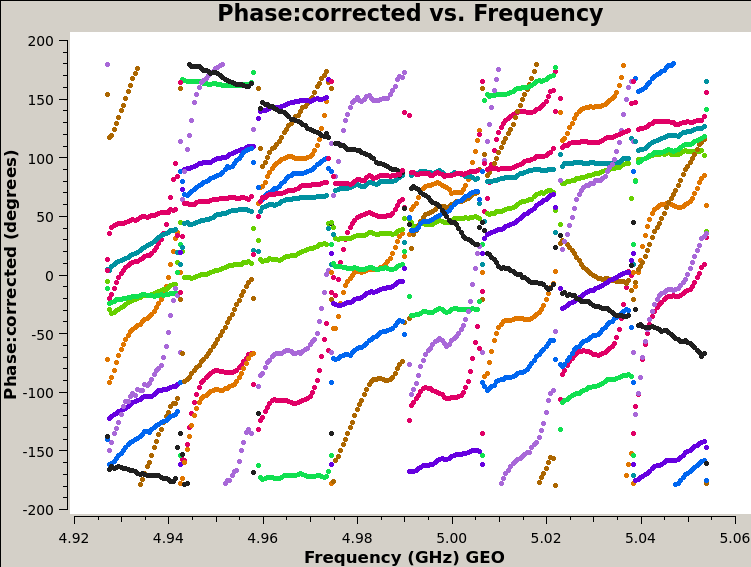

True

Show log 2020-11-02 22:08:38	INFO	plotms::::	
 2020-11-02 22:08:38	INFO	plotms::::+	##########################################
 2020-11-02 22:08:38	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:08:38	INFO	plotms::::	plotms(vis="/home/jupyter/data/n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:08:38	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:08:38	INFO	plotms::::+ yaxis="phase",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:08:38	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-02 22:08:38	INFO	plotms::::+ antenna="EF",scan="37",correlation="ll",array="",observation="",
 2020-11-02 22:08:38	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:08:38	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:08:38	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:08:38	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:08:38	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:08:38	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:08:38	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:08:38	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:08:38	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:08:38	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:08:38	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:08:38	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:08:38	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:08:38	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:08:38	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:08:41	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:08:41	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:08:41	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:08:41	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:08:41	INFO	PlotMS::load_cache	START Current memory usage: 2283.53 kilobytes.
 2020-11-02 22:08:41	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:08:41	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 37, corr: ll
 2020-11-02 22:08:41	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:08:41	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:08:41	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-02 22:08:41	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):corrected vs. Frequency(6)...
 2020-11-02 22:08:42	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:08:43	INFO	PlotMS::load_cache	Data selection will yield a total of 2816 plottable points (flagged and unflagged).
 2020-11-02 22:08:43	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 2.128e-05 GB of memory (7.55682 bytes/point).
 2020-11-02 22:08:43	INFO	PlotMS::load_cache+	This is 0.0010437% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:08:43	INFO	PlotM

In [11]:
plotms(vis=vis, xaxis='frequency', yaxis='phase',ydatacolumn='corrected', 
    antenna=refant, correlation='ll',coloraxis='baseline', 
    scan=sbdscan,averagedata=True, avgtime='600')


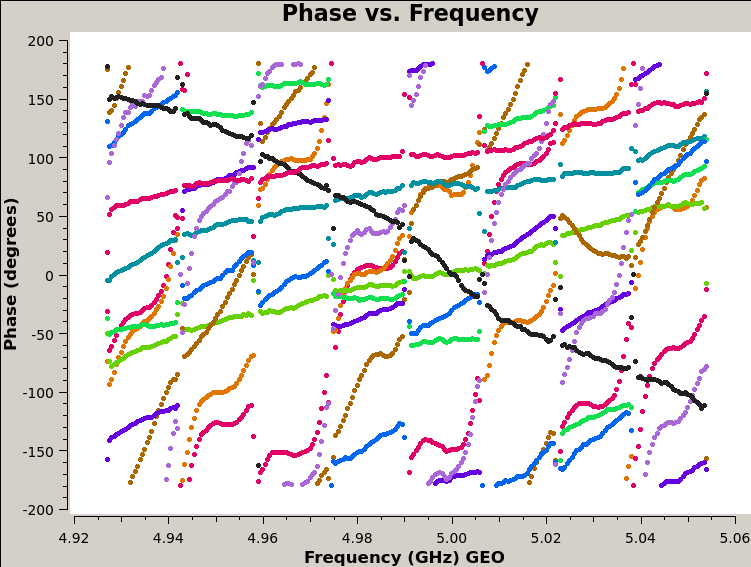

True

Show log 2020-11-02 22:08:46	INFO	plotms::::	
 2020-11-02 22:08:46	INFO	plotms::::+	##########################################
 2020-11-02 22:08:46	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:08:46	INFO	plotms::::	plotms(vis="/home/jupyter/data/n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:08:46	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:08:46	INFO	plotms::::+ yaxis="phase",ydatacolumn="data",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:08:46	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-02 22:08:46	INFO	plotms::::+ antenna="EF",scan="37",correlation="ll",array="",observation="",
 2020-11-02 22:08:46	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:08:46	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:08:46	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:08:46	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:08:46	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:08:46	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:08:46	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:08:46	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:08:46	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:08:46	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:08:46	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:08:46	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:08:46	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:08:46	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:08:46	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:08:46	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:08:46	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:08:46	INFO	PlotMS::load_cache	START Current memory usage: 4744.77 kilobytes.
 2020-11-02 22:08:46	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:08:46	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 37, corr: ll
 2020-11-02 22:08:46	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:08:46	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:08:46	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-02 22:08:46	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Frequency(6)...
 2020-11-02 22:08:46	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:08:48	INFO	PlotMS::load_cache	Data selection will yield a total of 2816 plottable points (flagged and unflagged).
 2020-11-02 22:08:48	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 2.128e-05 GB of memory (7.55682 bytes/point).
 2020-11-02 22:08:48	INFO	PlotMS::load_cache+	This is 0.0010437% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:08:48	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:08:49	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:08:49	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:08:49	INFO	PlotMS::load_cache	Finished loa

In [12]:
plotms(vis=vis, xaxis='frequency', yaxis='phase',ydatacolumn='data', 
    antenna=refant, correlation='ll',coloraxis='baseline', 
    scan=sbdscan,averagedata=True, avgtime='600')


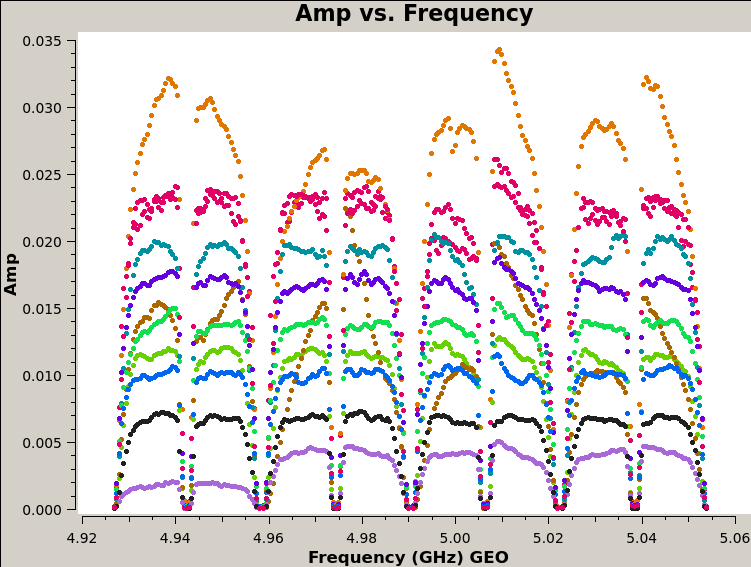

True

Show log 2020-11-02 22:08:50	INFO	plotms::::	
 2020-11-02 22:08:50	INFO	plotms::::+	##########################################
 2020-11-02 22:08:50	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:08:50	INFO	plotms::::	plotms(vis="/home/jupyter/data/n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:08:50	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:08:50	INFO	plotms::::+ yaxis="amp",ydatacolumn="data",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:08:50	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-02 22:08:50	INFO	plotms::::+ antenna="EF",scan="37",correlation="ll",array="",observation="",
 2020-11-02 22:08:50	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:08:50	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:08:50	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:08:50	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:08:50	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:08:50	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:08:50	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:08:50	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:08:50	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:08:50	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:08:50	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:08:50	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:08:50	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:08:50	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:08:50	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:08:50	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:08:50	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:08:50	INFO	PlotMS::load_cache	START Current memory usage: 4765.61 kilobytes.
 2020-11-02 22:08:50	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:08:50	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 37, corr: ll
 2020-11-02 22:08:50	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:08:50	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:08:50	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-02 22:08:50	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2020-11-02 22:08:50	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:08:52	INFO	PlotMS::load_cache	Data selection will yield a total of 2816 plottable points (flagged and unflagged).
 2020-11-02 22:08:52	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 2.128e-05 GB of memory (7.55682 bytes/point).
 2020-11-02 22:08:52	INFO	PlotMS::load_cache+	This is 0.0010437% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:08:52	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:08:53	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:08:53	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:08:53	INFO	PlotMS::load_cache	Finished loading

In [13]:
plotms(vis=vis, xaxis='frequency', yaxis='amp',ydatacolumn='data', 
    antenna=refant, correlation='ll',coloraxis='baseline', 
    scan=sbdscan,averagedata=True, avgtime='600')


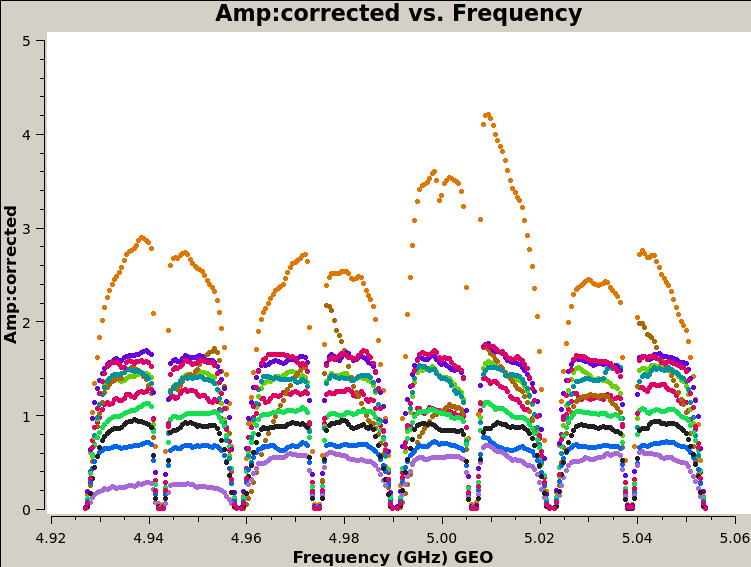

True

Show log 2020-11-02 22:08:54	INFO	plotms::::	
 2020-11-02 22:08:54	INFO	plotms::::+	##########################################
 2020-11-02 22:08:54	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:08:54	INFO	plotms::::	plotms(vis="/home/jupyter/data/n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:08:54	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:08:54	INFO	plotms::::+ yaxis="amp",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:08:54	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-02 22:08:54	INFO	plotms::::+ antenna="EF",scan="37",correlation="ll",array="",observation="",
 2020-11-02 22:08:54	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:08:54	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:08:54	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:08:54	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:08:54	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:08:54	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:08:54	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:08:54	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:08:54	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:08:54	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:08:54	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:08:54	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:08:54	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:08:54	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:08:54	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:08:54	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:08:54	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:08:54	INFO	PlotMS::load_cache	START Current memory usage: 4782.61 kilobytes.
 2020-11-02 22:08:54	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:08:54	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 37, corr: ll
 2020-11-02 22:08:54	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:08:54	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:08:54	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-02 22:08:54	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):corrected vs. Frequency(6)...
 2020-11-02 22:08:54	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:08:55	INFO	PlotMS::load_cache	Data selection will yield a total of 2816 plottable points (flagged and unflagged).
 2020-11-02 22:08:55	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 2.128e-05 GB of memory (7.55682 bytes/point).
 2020-11-02 22:08:55	INFO	PlotMS::load_cache+	This is 0.0010437% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:08:56	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:08:56	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:08:56	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:08:56	INFO	PlotMS::load_cache	Finish

In [14]:
plotms(vis=vis, xaxis='frequency', yaxis='amp',ydatacolumn='corrected', 
    antenna=refant, correlation='ll',coloraxis='baseline', 
    scan=sbdscan,averagedata=True, avgtime='600')

## Flagging

Apply the flags from the archival UV-flag file: already one above

Flag autocorrelations: this isusually done post-correlation

Flag bad antenna and poor scans

In [15]:
flagdata(vis,mode='manual',antenna='SV')
flagmanager(vis,mode='delete',versionname='flagdata_1')

Show log 2020-11-02 22:08:57	INFO	flagdata::::	
 2020-11-02 22:08:57	INFO	flagdata::::+	##########################################
 2020-11-02 22:08:57	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2020-11-02 22:08:57	INFO	flagdata::::	flagdata(vis="/home/jupyter/data/n14c3.ms",mode="manual",autocorr=False,inpfile="",reason="any",
 2020-11-02 22:08:57	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="SV",uvrange="",
 2020-11-02 22:08:57	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2020-11-02 22:08:57	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2020-11-02 22:08:57	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2020-11-02 22:08:57	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2020-11-02 22:08:57	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2020-11-02 22:08:57	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2020-11-02 22:08:57	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2020-11-02 22:08:57	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2020-11-02 22:08:57	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2020-11-02 22:08:57	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2020-11-02 22:08:57	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2020-11-02 22:08:57	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2020-11-02 22:08:57	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2020-11-02 22:08:57	INFO	flagdata::::+ writeflags=True)
 2020-11-02 22:08:57	INFO	flagdata::::	Backup original flags before applying new flags
 2020-11-02 22:08:57	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:08:57	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2020-11-02 22:09:02	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:09:02	INFO	flagdata::::	Manual mode is active
 2020-11-02 22:09:02	INFO	flagdata::::	Initializing the agents
 2020-11-02 22:09:02	INFO	Manual::setAgentParameters autocorr is 0
 2020-11-02 22:09:02	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2020-11-02 22:09:02	INFO	flagdata::::	Running the agentflagger tool
 2020-11-02 22:09:03	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:03	INFO	FlagMSHandler::	Chunk = 1 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 0, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 1080
 2020-11-02 22:09:03	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2020-11-02 22:09:03	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:03	INFO	FlagMSHandler::	Chunk = 2 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 1, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 1080
 2020-11-02 22:09:03	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2020-11-02 22:09:03	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:03	INFO	FlagMSHandler::	Chunk = 3 [progress: 1%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 2, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 1080
 2020-11-02 22:09:03	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2020-11-02 22:09:03	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:03	INFO	Fl

In [16]:
flagdata(vis,mode='manual',antenna='HH',scan='62')
flagmanager(vis,mode='delete',versionname='flagdata_1')

Show log 2020-11-02 22:09:48	INFO	flagdata::::	
 2020-11-02 22:09:48	INFO	flagdata::::+	##########################################
 2020-11-02 22:09:48	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2020-11-02 22:09:48	INFO	flagdata::::	flagdata(vis="/home/jupyter/data/n14c3.ms",mode="manual",autocorr=False,inpfile="",reason="any",
 2020-11-02 22:09:48	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="HH",uvrange="",
 2020-11-02 22:09:48	INFO	flagdata::::+ timerange="",correlation="",scan="62",intent="",array="",
 2020-11-02 22:09:48	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2020-11-02 22:09:48	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2020-11-02 22:09:48	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2020-11-02 22:09:48	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2020-11-02 22:09:48	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2020-11-02 22:09:48	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2020-11-02 22:09:48	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2020-11-02 22:09:48	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2020-11-02 22:09:48	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2020-11-02 22:09:48	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2020-11-02 22:09:48	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2020-11-02 22:09:48	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2020-11-02 22:09:48	INFO	flagdata::::+ writeflags=True)
 2020-11-02 22:09:48	INFO	flagdata::::	Backup original flags before applying new flags
 2020-11-02 22:09:48	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:09:48	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2020-11-02 22:09:54	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:09:54	INFO	flagdata::::	Manual mode is active
 2020-11-02 22:09:54	INFO	flagdata::::	Initializing the agents
 2020-11-02 22:09:54	INFO	Manual::setAgentParameters autocorr is 0
 2020-11-02 22:09:54	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2020-11-02 22:09:54	INFO	flagdata::::	Running the agentflagger tool
 2020-11-02 22:09:54	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:54	INFO	FlagMSHandler::	Chunk = 1 [progress: 12%], Observation = 0, Array = 0, Scan = 62, Field = 3 (1848+283), Spw = 0, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 300
 2020-11-02 22:09:54	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2020-11-02 22:09:54	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:54	INFO	FlagMSHandler::	Chunk = 2 [progress: 25%], Observation = 0, Array = 0, Scan = 62, Field = 3 (1848+283), Spw = 1, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 300
 2020-11-02 22:09:54	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2020-11-02 22:09:54	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:09:54	INFO	FlagMSHandler::	Chunk = 3 [progress: 37%], Observation = 0, Array = 0, Scan = 62, Field = 3 (1848+283), Spw = 2, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 300
 2020-11-02 22:09:54	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2020-11-02 22:09:54	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22

Flag the edge channels

In [17]:
flagdata(vis,mode='manual',spw='*:0~2;29~31')
flagmanager(vis,mode='delete',versionname='flagdata_1')

Show log 2020-11-02 22:09:55	INFO	flagdata::::	
 2020-11-02 22:09:55	INFO	flagdata::::+	##########################################
 2020-11-02 22:09:55	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2020-11-02 22:09:55	INFO	flagdata::::	flagdata(vis="/home/jupyter/data/n14c3.ms",mode="manual",autocorr=False,inpfile="",reason="any",
 2020-11-02 22:09:55	INFO	flagdata::::+ tbuff=0.0,spw="*:0~2;29~31",field="",antenna="",uvrange="",
 2020-11-02 22:09:55	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2020-11-02 22:09:55	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2020-11-02 22:09:55	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2020-11-02 22:09:55	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2020-11-02 22:09:55	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2020-11-02 22:09:55	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2020-11-02 22:09:55	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2020-11-02 22:09:55	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2020-11-02 22:09:55	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2020-11-02 22:09:55	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2020-11-02 22:09:55	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2020-11-02 22:09:55	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2020-11-02 22:09:55	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2020-11-02 22:09:55	INFO	flagdata::::+ writeflags=True)
 2020-11-02 22:09:55	INFO	flagdata::::	Backup original flags before applying new flags
 2020-11-02 22:09:55	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:09:55	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2020-11-02 22:10:00	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:10:00	INFO	flagdata::::	Manual mode is active
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData Selected spw-channels ids are Axis Lengths: [16, 4] (NB: Matrix in Row/Column order)
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData +	[0, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 0, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 1, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 1, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 2, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 2, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 3, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 3, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 4, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 4, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 5, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 5, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 6, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 6, 29, 31, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 7, 0, 2, 1
 2020-11-02 22:10:01	INFO	FlagMSHandler::selectData + 7, 29, 31, 1]
 2020-11-02 22:10:01	INFO	flagdata::::	Initializing the agents
 2020-11-02 22:10:01	INFO	Manual::setAgentParameters autocorr is 0
 2020-11-02 22:10:01	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2020-11-02 22:10:01	INFO	flagdata::::	Running the agentflagger tool
 2020-11-02 22:10:02	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-

Flag the first 5 seconds of every scan

In [18]:
flagdata(vis,mode='quack',quackinterval=5)

{}

Show log 2020-11-02 22:10:51	INFO	flagdata::::	
 2020-11-02 22:10:51	INFO	flagdata::::+	##########################################
 2020-11-02 22:10:51	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2020-11-02 22:10:51	INFO	flagdata::::	flagdata(vis="/home/jupyter/data/n14c3.ms",mode="quack",autocorr=False,inpfile="",reason="any",
 2020-11-02 22:10:51	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2020-11-02 22:10:51	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2020-11-02 22:10:51	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2020-11-02 22:10:51	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2020-11-02 22:10:51	INFO	flagdata::::+ quackinterval=5,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2020-11-02 22:10:51	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2020-11-02 22:10:51	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2020-11-02 22:10:51	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2020-11-02 22:10:51	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2020-11-02 22:10:51	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2020-11-02 22:10:51	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2020-11-02 22:10:51	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2020-11-02 22:10:51	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2020-11-02 22:10:51	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2020-11-02 22:10:51	INFO	flagdata::::+ writeflags=True)
 2020-11-02 22:10:51	INFO	flagdata::::	Backup original flags before applying new flags
 2020-11-02 22:10:51	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:10:51	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2020-11-02 22:10:57	INFO	AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:10:57	INFO	flagdata::::	Quack mode is active
 2020-11-02 22:10:57	INFO	flagdata::::	Initializing the agents
 2020-11-02 22:10:57	INFO	Quack::setAgentParameters quackinterval is 5
 2020-11-02 22:10:57	INFO	Quack::setAgentParameters quackmode is beg
 2020-11-02 22:10:57	INFO	Quack::setAgentParameters quackincrement is 0
 2020-11-02 22:10:57	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2020-11-02 22:10:57	INFO	flagdata::::	Running the agentflagger tool
 2020-11-02 22:11:00	INFO	FlagMSHandler::preSweep 75 Scans found in MS
 2020-11-02 22:11:00	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:11:00	INFO	FlagMSHandler::	Chunk = 1 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 0, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 6600
 2020-11-02 22:11:00	INFO	Quack::chunkSummary	=> Data flagged so far 2.5%
 2020-11-02 22:11:00	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:11:00	INFO	FlagMSHandler::	Chunk = 2 [progress: 0%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 1, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 6600
 2020-11-02 22:11:00	INFO	Quack::chunkSummary	=> Data flagged so far 2.5%
 2020-11-02 22:11:00	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2020-11-02 22:11:00	INFO	FlagMSHandler::	Chunk = 3 [progress: 1%], Observation = 0, Array = 0, Scan = 1, Field = 1 (3C345), Spw = 2, Channels = 32, Corrs = [ RR RL LR LL ], Total Rows = 6600
 2020-11-02 22:11:00	IN

Now that all the flagging is done, save the flags to restore them prior to calibration reruns

In [19]:
flagmanager(vis,mode='save',versionname='precal_flags',
    comment='Flags from Tsys, gaincal, bad data and edge channels')

Show log 2020-11-02 22:11:13	INFO	flagmanager::::	
 2020-11-02 22:11:13	INFO	flagmanager::::+	##########################################
 2020-11-02 22:11:13	INFO	flagmanager::::+	##### Begin Task: flagmanager #####
 2020-11-02 22:11:13	INFO	flagmanager::::	flagmanager(vis="/home/jupyter/data/n14c3.ms",mode="save",versionname="precal_flags",oldname="",comment="Flags from Tsys, gaincal, bad data and edge channels",
 2020-11-02 22:11:13	INFO	flagmanager::::+ merge="replace")
 2020-11-02 22:11:13	INFO	flagmanager::AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:11:13	INFO	flagmanager::::	Save current flagversions to precal_flags
 2020-11-02 22:11:13	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called precal_flags
 2020-11-02 22:11:19	INFO	flagmanager::::	##### End Task: flagmanager #####
 2020-11-02 22:11:19	INFO	flagmanager::::+	##########################################

## Fringe fitting

The initial step of fringe fitting includes only the instrumental delay. This requires a bright target source as input, and only a single scan. Within the scan a solution is determined for each spectral window. Rates cannot be determined due to the lack of a longer time baseline in a single scan. In this case scan 56 is used, which can be entered as a timerange or a scan number. Note that scan numbers can differ from the AIPS scan numbers. Use the listobs file generated at the start of the notebook to get the CASA scan number.

In [20]:
fringefit(vis, caltable=sbdtab, scan=sbdscan, 
        solint='inf', zerorates=True, refant=refant,minsnr=50,
        gaintable=[gcaltab,tsystab],
        interp=['nearest','nearest,nearest'],
        parang=True)

Show log 2020-11-02 22:11:19	INFO	fringefit::::	
 2020-11-02 22:11:19	INFO	fringefit::::+	##########################################
 2020-11-02 22:11:19	INFO	fringefit::::+	##### Begin Task: fringefit #####
 2020-11-02 22:11:19	INFO	fringefit::::	fringefit(vis="/home/jupyter/data/n14c3.ms",caltable="/home/jupyter/data/n14c3.sbd",field="",spw="",intent="",
 2020-11-02 22:11:19	INFO	fringefit::::+ selectdata=True,timerange="",antenna="",scan="37",observation="",
 2020-11-02 22:11:19	INFO	fringefit::::+ msselect="",solint="inf",combine="",refant="EF",minsnr=50,
 2020-11-02 22:11:19	INFO	fringefit::::+ zerorates=True,globalsolve=True,niter=100,delaywindow=[],ratewindow=[],
 2020-11-02 22:11:19	INFO	fringefit::::+ append=False,docallib=False,callib="",gaintable=['/home/jupyter/data/n14c3.gcal', '/home/jupyter/data/n14c3.tsys'],gainfield=[''],
 2020-11-02 22:11:19	INFO	fringefit::::+ interp=['nearest', 'nearest,nearest'],spwmap=[],parang=True)
 2020-11-02 22:11:19	INFO	fringefit::::	Setting vi to False
 2020-11-02 22:11:19	WARN	calibrater::setvi(bool,bool)	Already using NEW VisibilityIterator.
 2020-11-02 22:11:19	INFO	calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 22:11:19	INFO	calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 22:11:19	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 22:11:19	INFO	fringefit::::	Selecting data
 2020-11-02 22:11:19	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-02 22:11:19	INFO	calibrater::reset	Reseting solve/apply state
 2020-11-02 22:11:19	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-02 22:11:19	INFO	Calibrater::selectvis+ Selecting on scan: '37'
 2020-11-02 22:11:19	INFO	Calibrater::selectvis	By selection 1846080 rows are reduced to 74880
 2020-11-02 22:11:19	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-02 22:11:19	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-11-02 22:11:19	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:11:19	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:11:19	INFO	Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=nearest spwmap=[-1] calWt=true
 2020-11-02 22:11:19	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:11:19	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:11:20	INFO	Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=nearest,nearest spwmap=[-1] calWt=true
 2020-11-02 22:11:20	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:11:20	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:11:20	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2020-11-02 22:11:20	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-11-02 22:11:20	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-11-02 22:11:20	INFO	Calibrater::setsolve	. Fringe Jones: table=/home/jupyter/data/n14c3.sbd append=false solint=inf refantmode='flex' refant='EF' minsnr=50 apmode=AP solnorm=false
 2020-11-02 22:11:20	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-11-02 22:11:20	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-11-02 22:11:20	INFO	Calibrater::solve	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=nearest,nearest spwmap=[-1] calWt=true
 2020-11-02 22:11:20	INFO	Calibrater::solve	. P Jones 
 2020-11-02 22:11:20	INFO	Calibrater::solve	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=nearest spwmap=[-1] calWt=true
 2020-11-02 22:11:20	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020

In [21]:
applycal(vis=vis,gaintable=[tsystab,gcaltab,sbdtab], flagbackup=False, parang=True)

Show log 2020-11-02 22:12:20	INFO	applycal::::	
 2020-11-02 22:12:20	INFO	applycal::::+	##########################################
 2020-11-02 22:12:20	INFO	applycal::::+	##### Begin Task: applycal #####
 2020-11-02 22:12:20	INFO	applycal::::	applycal(vis="/home/jupyter/data/n14c3.ms",field="",spw="",intent="",selectdata=True,
 2020-11-02 22:12:20	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2020-11-02 22:12:20	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['/home/jupyter/data/n14c3.tsys', '/home/jupyter/data/n14c3.gcal', '/home/jupyter/data/n14c3.sbd'],gainfield=[],
 2020-11-02 22:12:20	INFO	applycal::::+ interp=[],spwmap=[],calwt=[True],parang=True,applymode="",
 2020-11-02 22:12:20	INFO	applycal::::+ flagbackup=False)
 2020-11-02 22:12:20	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 22:12:20	INFO	applycal::calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 22:12:21	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 22:12:21	INFO	applycal::calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-02 22:12:21	INFO	applycal::calibrater::reset	Reseting solve/apply state
 2020-11-02 22:12:21	INFO	applycal::Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-02 22:12:21	INFO	applycal::Calibrater::selectvis	Selection did not drop any rows
 2020-11-02 22:12:21	INFO	applycal::Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-02 22:12:21	INFO	applycal::calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-11-02 22:12:21	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-02 22:12:21	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=linear spwmap=[-1] calWt=true
 2020-11-02 22:12:21	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:12:21	INFO	applycal:::: (Fringe Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	. Fringe Jones: table=/home/jupyter/data/n14c3.sbd select= interp=linear spwmap=[-1] calWt=false
 2020-11-02 22:12:21	INFO	applycal::calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:12:21	INFO	applycal::Calibrater::setapply(type, applypar)	. P Jones 
 2020-11-02 22:12:21	INFO	applycal::calibrater::correct	Beginning correct---------------------------
 2020-11-02 22:12:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	The following calibration terms are arranged for apply:
 2020-11-02 22:12:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-02 22:12:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. Fringe Jones: table=/home/jupyter/data/n14c3.sbd select= interp=linear spwmap=[-1] calWt=false
 2020-11-02 22:12:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. P Jones 
 2020-11-02 22:12:21	INFO	applycal::Calibrater::correct2 (VI2/VB2)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=linear spwmap=[-1] calWt=true

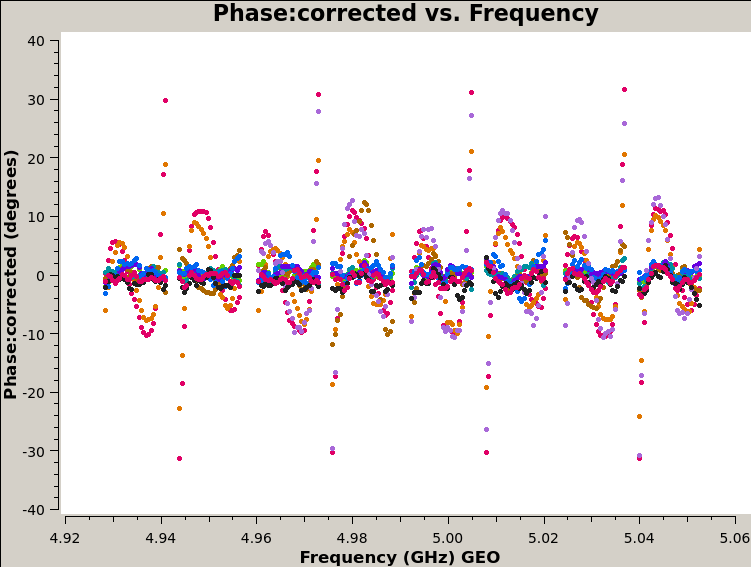

True

Show log 2020-11-02 22:22:39	INFO	plotms::::	
 2020-11-02 22:22:39	INFO	plotms::::+	##########################################
 2020-11-02 22:22:39	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:22:39	INFO	plotms::::	plotms(vis="/home/jupyter/data/n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:22:39	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:22:39	INFO	plotms::::+ yaxis="phase",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:22:39	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-02 22:22:39	INFO	plotms::::+ antenna="EF",scan="37",correlation="ll",array="",observation="",
 2020-11-02 22:22:39	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:22:39	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:22:39	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:22:39	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:22:39	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:22:39	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:22:39	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:22:39	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:22:39	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:22:39	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:22:39	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:22:39	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:22:39	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:22:39	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:22:39	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:22:39	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:22:39	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:22:39	INFO	PlotMS::load_cache	START Current memory usage: 4799.64 kilobytes.
 2020-11-02 22:22:39	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:22:39	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 37, corr: ll
 2020-11-02 22:22:39	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:22:39	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:22:39	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-02 22:22:39	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):corrected vs. Frequency(6)...
 2020-11-02 22:22:39	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:22:41	INFO	PlotMS::load_cache	Data selection will yield a total of 2816 plottable points (flagged and unflagged).
 2020-11-02 22:22:41	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 2.128e-05 GB of memory (7.55682 bytes/point).
 2020-11-02 22:22:41	INFO	PlotMS::load_cache+	This is 0.0010437% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:22:41	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:22:43	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:22:43	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:22:43	INFO	PlotMS::load_cache	Fi

In [22]:
plotms(vis=vis, xaxis='frequency',yaxis='phase', 
    ydatacolumn='corrected', antenna=refant, correlation='ll',
       coloraxis='baseline', scan=sbdscan,
       averagedata=True, avgtime='600')

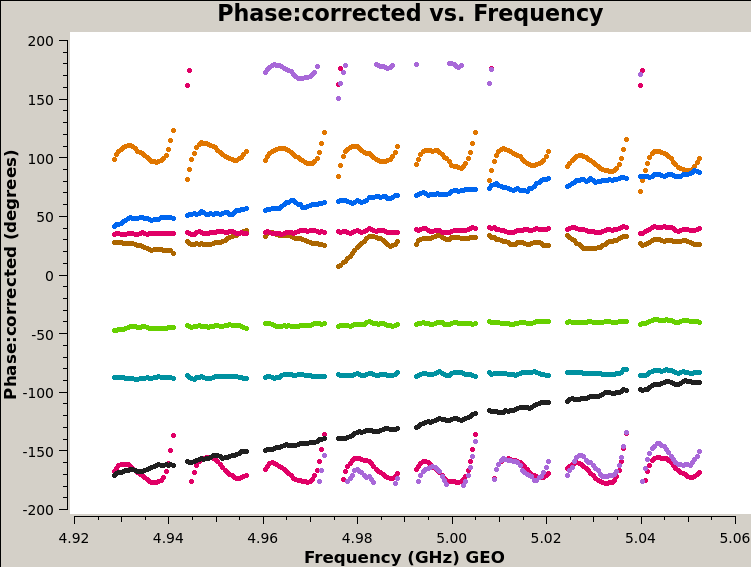

True

Show log 2020-11-02 22:22:44	INFO	plotms::::	
 2020-11-02 22:22:44	INFO	plotms::::+	##########################################
 2020-11-02 22:22:44	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:22:44	INFO	plotms::::	plotms(vis="/home/jupyter/data/n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:22:44	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:22:44	INFO	plotms::::+ yaxis="phase",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:22:44	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-11-02 22:22:44	INFO	plotms::::+ antenna="EF",scan="2",correlation="ll",array="",observation="",
 2020-11-02 22:22:44	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:22:44	INFO	plotms::::+ avgtime="600",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:22:44	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:22:44	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:22:44	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:22:44	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:22:44	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:22:44	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:22:44	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:22:44	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:22:44	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:22:44	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:22:44	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:22:44	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:22:44	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:22:44	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:22:44	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:22:44	INFO	PlotMS::load_cache	START Current memory usage: 4810.44 kilobytes.
 2020-11-02 22:22:44	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:22:44	INFO	PlotMS::load_cache Selection: antenna: EF, scan: 2, corr: ll
 2020-11-02 22:22:44	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:22:44	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:22:44	INFO	PlotMS::load_cache+ Time: 600 seconds. Scan: false; Field: false
 2020-11-02 22:22:44	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):corrected vs. Frequency(6)...
 2020-11-02 22:22:44	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:22:46	INFO	PlotMS::load_cache	Data selection will yield a total of 2560 plottable points (flagged and unflagged).
 2020-11-02 22:22:46	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 1.9648e-05 GB of memory (7.675 bytes/point).
 2020-11-02 22:22:46	INFO	PlotMS::load_cache+	This is 0.000963655% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:22:46	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:22:47	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:22:47	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:22:47	INFO	PlotMS::load_cache	Fin

In [23]:
plotms(vis=vis, xaxis='frequency',yaxis='phase', 
    ydatacolumn='corrected', antenna=refant, correlation='ll',
       coloraxis='baseline', scan='2',
       averagedata=True, avgtime='600')

At this point an inspection of the resulting calibration can be done by applying all calibration tables to the scan used for fringe fitting, and plotting the phases per baseline as a function of frequency.

The next step is the multi-band delay, which includes phases as a function of time and frequency for all the phase-reference scans (delay and rate is determined).

In [24]:
fringefit(vis, caltable=mbdtab, field=mbdfield,
        solint='60s', zerorates=False, refant=refant,
        combine='spw', minsnr=50,
        gaintable=[gcaltab, tsystab, sbdtab],
        parang=True)

Show log 2020-11-02 22:22:48	INFO	fringefit::::	
 2020-11-02 22:22:48	INFO	fringefit::::+	##########################################
 2020-11-02 22:22:48	INFO	fringefit::::+	##### Begin Task: fringefit #####
 2020-11-02 22:22:48	INFO	fringefit::::	fringefit(vis="/home/jupyter/data/n14c3.ms",caltable="/home/jupyter/data/n14c3.mbd",field="1848+283,J1640+3946",spw="",intent="",
 2020-11-02 22:22:48	INFO	fringefit::::+ selectdata=True,timerange="",antenna="",scan="",observation="",
 2020-11-02 22:22:48	INFO	fringefit::::+ msselect="",solint="60s",combine="spw",refant="EF",minsnr=50,
 2020-11-02 22:22:48	INFO	fringefit::::+ zerorates=False,globalsolve=True,niter=100,delaywindow=[],ratewindow=[],
 2020-11-02 22:22:48	INFO	fringefit::::+ append=False,docallib=False,callib="",gaintable=['/home/jupyter/data/n14c3.gcal', '/home/jupyter/data/n14c3.tsys', '/home/jupyter/data/n14c3.sbd'],gainfield=[''],
 2020-11-02 22:22:48	INFO	fringefit::::+ interp=[],spwmap=[],parang=True)
 2020-11-02 22:22:48	INFO	fringefit::::	Setting vi to False
 2020-11-02 22:22:48	WARN	calibrater::setvi(bool,bool)	Already using NEW VisibilityIterator.
 2020-11-02 22:22:48	INFO	calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 22:22:48	INFO	calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 22:22:48	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 22:22:48	INFO	fringefit::::	Selecting data
 2020-11-02 22:22:48	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-02 22:22:48	INFO	calibrater::reset	Reseting solve/apply state
 2020-11-02 22:22:48	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-02 22:22:48	INFO	Calibrater::selectvis+ Selecting on field: '1848+283,J1640+3946'
 2020-11-02 22:22:48	INFO	Calibrater::selectvis	By selection 1846080 rows are reduced to 643200
 2020-11-02 22:22:48	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-02 22:22:48	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-11-02 22:22:48	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:22:48	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=linear spwmap=[-1] calWt=true
 2020-11-02 22:22:49	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=linear,linear spwmap=[-1] calWt=true
 2020-11-02 22:22:49	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:22:49	INFO (Fringe Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	. Fringe Jones: table=/home/jupyter/data/n14c3.sbd select= interp=linear spwmap=[-1] calWt=false
 2020-11-02 22:22:49	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:22:49	INFO	Calibrater::setapply(type, applypar)	. P Jones 
 2020-11-02 22:22:49	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-11-02 22:22:49	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-11-02 22:22:49	INFO	Calibrater::setsolve	. Fringe Jones: table=/home/jupyter/data/n14c3.mbd append=false solint=60s refantmode='flex' refant='EF' minsnr=50 apmode=AP solnorm=false
 2020-11-02 22:22:49	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-11-02 22:22:49	INFO	Calibrater::solve	The following calibration

Check the output on the logger to see how many solutions are found by fringefit. This is a good initial indication if this worked well or not. Note that the second fringe fit step determines a single solution for all spectral-windows.

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


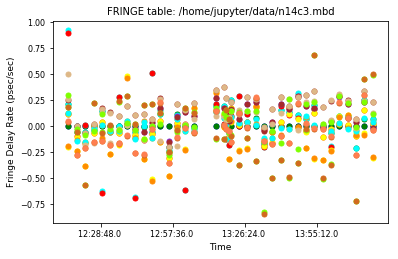

Show log 2020-11-02 22:25:49	INFO	plotcal::::	
 2020-11-02 22:25:49	INFO	plotcal::::+	##########################################
 2020-11-02 22:25:49	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-11-02 22:25:49	INFO	plotcal::::	plotcal(caltable="/home/jupyter/data/n14c3.mbd",xaxis="time",yaxis="rate",poln="",field="",
 2020-11-02 22:25:49	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-11-02 22:25:49	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[],showflags=False,plotsymbol="o",
 2020-11-02 22:25:49	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-11-02 22:25:49	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-11-02 22:25:49	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-11-02 22:25:49	INFO	FlagVersion::saveFlagVersion	Now get the data
 2020-11-02 22:25:49	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2020-11-02 22:25:50	INFO	plotcal::::	##### End Task: plotcal #####
 2020-11-02 22:25:50	INFO	plotcal::::+	##########################################

In [25]:
plotcal(mbdtab, xaxis='time', yaxis='rate')

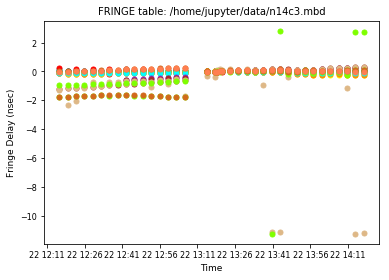

Show log 2020-11-02 22:25:50	INFO	plotcal::::	
 2020-11-02 22:25:50	INFO	plotcal::::+	##########################################
 2020-11-02 22:25:50	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-11-02 22:25:50	INFO	plotcal::::	plotcal(caltable="/home/jupyter/data/n14c3.mbd",xaxis="time",yaxis="delay",poln="",field="",
 2020-11-02 22:25:50	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-11-02 22:25:50	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[],showflags=False,plotsymbol="o",
 2020-11-02 22:25:50	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-11-02 22:25:50	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-11-02 22:25:50	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-11-02 22:25:50	INFO	FlagVersion::saveFlagVersion	Now get the data
 2020-11-02 22:25:50	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2020-11-02 22:25:50	INFO	plotcal::::	##### End Task: plotcal #####
 2020-11-02 22:25:50	INFO	plotcal::::+	##########################################

In [26]:
plotcal(mbdtab,xaxis='time',yaxis='delay')

## Bandpass

The final step in the calibration is the bandpass. CASA performs a complex bandpass, which means it fits both amplitude and phase. As a consequence the bandpass correction can in principle change the phase solutions which would then require a second round of fringe fitting to be corrected. It is important to verify the solutions after the bandpass step.

In [27]:
bandpass(vis, caltable=bpasstab, field=bpassfield,
        gaintable=[gcaltab, tsystab, sbdtab, mbdtab],
        interp=['nearest','nearest,nearest','nearest','linear'],
        spwmap=[[],[],[], 8*[0]],
        solnorm=True, solint='inf', refant=refant, 
        bandtype='B', parang=True)

Show log 2020-11-02 22:25:50	INFO	bandpass::::	
 2020-11-02 22:25:50	INFO	bandpass::::+	##########################################
 2020-11-02 22:25:50	INFO	bandpass::::+	##### Begin Task: bandpass #####
 2020-11-02 22:25:50	INFO	bandpass::::	bandpass(vis="/home/jupyter/data/n14c3.ms",caltable="/home/jupyter/data/n14c3.bpass",field="1848+283",spw="",intent="",
 2020-11-02 22:25:50	INFO	bandpass::::+ selectdata=True,timerange="",uvrange="",antenna="",scan="",
 2020-11-02 22:25:50	INFO	bandpass::::+ observation="",msselect="",solint="inf",combine="scan",refant="EF",
 2020-11-02 22:25:50	INFO	bandpass::::+ minblperant=4,minsnr=3.0,solnorm=True,bandtype="B",smodel=[],
 2020-11-02 22:25:50	INFO	bandpass::::+ append=False,fillgaps=0,degamp=3,degphase=3,visnorm=False,
 2020-11-02 22:25:50	INFO	bandpass::::+ maskcenter=0,maskedge=5,docallib=False,callib="",gaintable=['/home/jupyter/data/n14c3.gcal', '/home/jupyter/data/n14c3.tsys', '/home/jupyter/data/n14c3.sbd', '/home/jupyter/data/n14c3.mbd'],
 2020-11-02 22:25:50	INFO	bandpass::::+ gainfield=[''],interp=['nearest', 'nearest,nearest', 'nearest', 'linear'],spwmap=[[], [], [], [0, 0, 0, 0, 0, 0, 0, 0]],parang=True)
 2020-11-02 22:25:50	INFO	bandpass::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 22:25:50	INFO	bandpass::calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 22:25:50	INFO	bandpass::Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 22:25:50	INFO	bandpass::calibrater::reset	Reseting solve/apply state
 2020-11-02 22:25:50	INFO	bandpass::::	NB: bandpass automatically excludes auto-correlations.
 2020-11-02 22:25:50	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-02 22:25:50	INFO	calibrater::reset	Reseting solve/apply state
 2020-11-02 22:25:50	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-02 22:25:50	INFO	Calibrater::selectvis+ Selecting on field: '1848+283'
 2020-11-02 22:25:50	INFO	Calibrater::selectvis+ Selecting with TaQL: 'ANTENNA1!=ANTENNA2'
 2020-11-02 22:25:51	INFO	Calibrater::selectvis	By selection 1846080 rows are reduced to 327360
 2020-11-02 22:25:51	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-02 22:25:51	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect='ANTENNA1!=ANTENNA2'
 2020-11-02 22:25:51	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=nearest spwmap=[] calWt=true
 2020-11-02 22:25:51	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=nearest,nearest spwmap=[] calWt=true
 2020-11-02 22:25:51	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:25:51	INFO (Fringe Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	. Fringe Jones: table=/home/jupyter/data/n14c3.sbd select= interp=nearest spwmap=[] calWt=false
 2020-11-02 22:25:51	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:25:51	INFO (Fringe Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-11-02 22:25:51	INFO	Calibrater::setapply(type, applypar)	. Fringe Jones: table=/home/jupyter/data/n14c3.mbd select= interp=linear spwmap=[0, 0, 0, 0, 0, 0, 0, 0] calWt=false
 2020-11-02 22:25

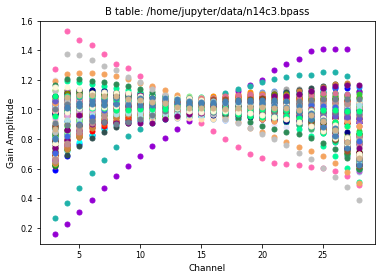

Show log 2020-11-02 22:26:20	INFO	plotcal::::	
 2020-11-02 22:26:20	INFO	plotcal::::+	##########################################
 2020-11-02 22:26:20	INFO	plotcal::::+	##### Begin Task: plotcal #####
 2020-11-02 22:26:20	INFO	plotcal::::	plotcal(caltable="/home/jupyter/data/n14c3.bpass",xaxis="",yaxis="",poln="",field="",
 2020-11-02 22:26:20	INFO	plotcal::::+ antenna="",spw="",timerange="",subplot=111,overplot=False,
 2020-11-02 22:26:20	INFO	plotcal::::+ clearpanel="Auto",iteration="",plotrange=[],showflags=False,plotsymbol="o",
 2020-11-02 22:26:20	INFO	plotcal::::+ plotcolor="blue",markersize=5.0,fontsize=10.0,showgui=True,figfile="")
 2020-11-02 22:26:20	INFO	tableplot::setgui	Switching to GUI mode. All current plots will be reset.
 2020-11-02 22:26:20	INFO	plotcal::createCalTab Detected a NewCalTable!
 2020-11-02 22:26:20	INFO	FlagVersion::saveFlagVersion	Now get the data
 2020-11-02 22:26:20	INFO	FlagVersion::saveFlagVersion	Done Processing data ... 
 2020-11-02 22:26:38	INFO	plotcal::::	##### End Task: plotcal #####
 2020-11-02 22:26:38	INFO	plotcal::::+	##########################################

In [28]:
plotcal(bpasstab)

## Apply calibration and split sources

The last step is to apply all calibration tables to the data. Note the specific settings of the swpmap parameter. This step can take a while to run. The splitting is done per pair of target - phase reference source, which is a matter of personal taste.

In [29]:
applycal(vis,
    gaintable=[gcaltab, tsystab, sbdtab, mbdtab, bpasstab],
    interp=['nearest','nearest,nearest','nearest','linear','linear,linear'],
    spwmap=[[], [], [], 8*[0],[]],
    parang=True)

Show log 2020-11-02 22:26:40	INFO	applycal::::	
 2020-11-02 22:26:40	INFO	applycal::::+	##########################################
 2020-11-02 22:26:40	INFO	applycal::::+	##### Begin Task: applycal #####
 2020-11-02 22:26:40	INFO	applycal::::	applycal(vis="/home/jupyter/data/n14c3.ms",field="",spw="",intent="",selectdata=True,
 2020-11-02 22:26:40	INFO	applycal::::+ timerange="",uvrange="",antenna="",scan="",observation="",
 2020-11-02 22:26:40	INFO	applycal::::+ msselect="",docallib=False,callib="",gaintable=['/home/jupyter/data/n14c3.gcal', '/home/jupyter/data/n14c3.tsys', '/home/jupyter/data/n14c3.sbd', '/home/jupyter/data/n14c3.mbd', '/home/jupyter/data/n14c3.bpass'],gainfield=[],
 2020-11-02 22:26:40	INFO	applycal::::+ interp=['nearest', 'nearest,nearest', 'nearest', 'linear', 'linear,linear'],spwmap=[[], [], [], [0, 0, 0, 0, 0, 0, 0, 0], []],calwt=[True],parang=True,applymode="",
 2020-11-02 22:26:40	INFO	applycal::::+ flagbackup=True)
 2020-11-02 22:26:40	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
 2020-11-02 22:26:40	INFO	applycal::calibrater::open	Opening MS: /home/jupyter/data/n14c3.ms for calibration.
 2020-11-02 22:26:40	INFO	applycal::Calibrater::	Initializing nominal selection to the whole MS.
 2020-11-02 22:26:40	INFO	applycal::AgentFlagger::open	Table type is Measurement Set
 2020-11-02 22:26:40	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called applycal_1
 2020-11-02 22:26:45	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-11-02 22:26:45	INFO	calibrater::reset	Reseting solve/apply state
 2020-11-02 22:26:45	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-11-02 22:26:45	INFO	Calibrater::selectvis	Selection did not drop any rows
 2020-11-02 22:26:45	INFO	Calibrater::selectvis	Frequency selection: Selecting all channels in all spws.
 2020-11-02 22:26:45	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-11-02 22:26:45	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	. EGainCurve: table=/home/jupyter/data/n14c3.gcal select= interp=nearest spwmap=[] calWt=true
 2020-11-02 22:26:45	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	. B TSYS: table=/home/jupyter/data/n14c3.tsys select= interp=nearest,nearest spwmap=[] calWt=true
 2020-11-02 22:26:45	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:26:45	INFO (Fringe Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	. Fringe Jones: table=/home/jupyter/data/n14c3.sbd select= interp=nearest spwmap=[] calWt=false
 2020-11-02 22:26:45	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:26:45	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:26:46	INFO (Fringe Jones: Enforcing calWt()=false for phase/delay-like terms)
 2020-11-02 22:26:46	INFO	Calibrater::setapply(type, applypar)	. Fringe Jones: table=/home/jupyter/data/n14c3.mbd select= interp=linear spwmap=[0, 0, 0, 0, 0, 0, 0, 0] calWt=false
 2020-11-02 22:26:46	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-------
 2020-11-02 22:26:46	INFO	Calibrater::setapply(type, applypar)	Arranging to APPLY:
 2020-11-02 22:26:46	INFO	Calibrater::setapply(type, applypar)	. B Jones: table=/home/jupyter/data/n14c3.bpass select= interp=linear,linear spwmap=[] calWt=true
 2020-11-02 22:26:46	INFO	calibrater::setapply	Beginning setapply--(MSSelection version)-

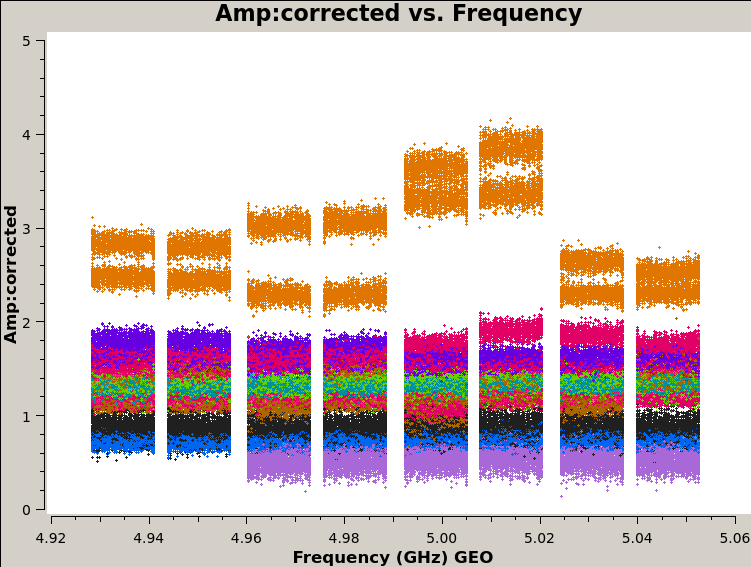

True

Show log 2020-11-02 22:37:43	INFO	plotms::::	
 2020-11-02 22:37:43	INFO	plotms::::+	##########################################
 2020-11-02 22:37:43	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:37:43	INFO	plotms::::	plotms(vis="n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:37:43	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:37:43	INFO	plotms::::+ yaxis="amplitude",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:37:43	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="13:18:00~13:20:00",uvrange="",
 2020-11-02 22:37:43	INFO	plotms::::+ antenna="EF",scan="",correlation="ll,rr",array="",observation="",
 2020-11-02 22:37:43	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:37:43	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:37:43	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:37:43	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:37:43	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:37:43	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:37:43	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:37:43	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:37:43	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:37:43	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:37:43	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:37:43	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:37:43	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:37:43	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:37:43	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:37:43	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:37:43	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:37:43	INFO	PlotMS::load_cache	START Current memory usage: 4823.14 kilobytes.
 2020-11-02 22:37:43	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:37:43	INFO	PlotMS::load_cache Selection: timerange: 13:18:00~13:20:00, antenna: EF, corr: ll,rr
 2020-11-02 22:37:43	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):corrected vs. Frequency(6)...
 2020-11-02 22:37:44	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:37:46	INFO	PlotMS::load_cache	Data selection will yield a total of 337920 plottable points (flagged and unflagged).
 2020-11-02 22:37:46	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.00229248 GB of memory (6.78409 bytes/point).
 2020-11-02 22:37:46	INFO	PlotMS::load_cache+	This is 0.112437% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:37:46	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:37:47	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:37:47	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:37:47	INFO	PlotMS::load_cache	Finished loading.
 2020-11-02 22:37:47	INFO	PlotMS::load_cache	Setting up iteration indexing (if necessary), and calculating plot ranges.
 2020-11-02 22:37:47	INFO	PlotMS::load_cache	Axes ranges:
 2020-

In [30]:
plotms(vis='n14c3.ms', xaxis='frequency', yaxis='amplitude',
       ydatacolumn='corrected',antenna="EF", correlation='ll,rr',
       coloraxis='baseline', timerange='13:18:00~13:20:00')

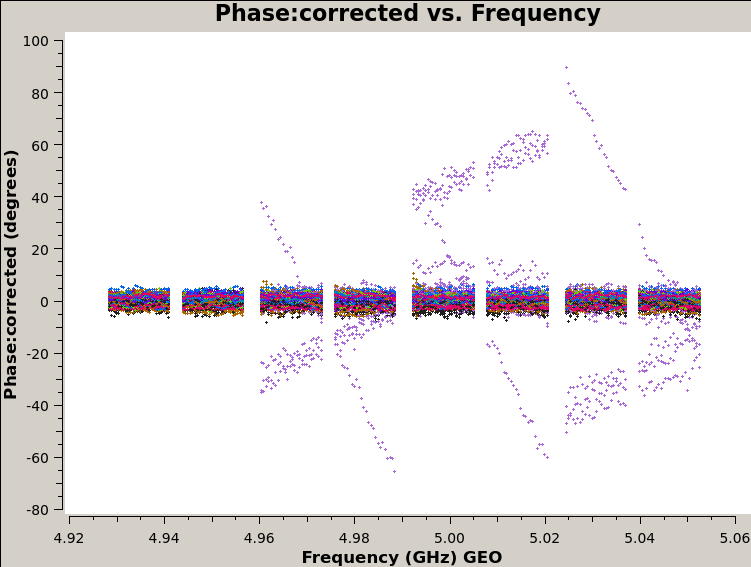

True

Show log 2020-11-02 22:37:49	INFO	plotms::::	
 2020-11-02 22:37:49	INFO	plotms::::+	##########################################
 2020-11-02 22:37:49	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-11-02 22:37:49	INFO	plotms::::	plotms(vis="n14c3.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-11-02 22:37:49	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2020-11-02 22:37:49	INFO	plotms::::+ yaxis="phase",ydatacolumn="corrected",yframe="",yinterp="",yaxislocation="",
 2020-11-02 22:37:49	INFO	plotms::::+ selectdata=True,field="1848+283",spw="",timerange="",uvrange="",
 2020-11-02 22:37:49	INFO	plotms::::+ antenna="EF",scan="",correlation="ll",array="",observation="",
 2020-11-02 22:37:49	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-11-02 22:37:49	INFO	plotms::::+ avgtime="120",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2020-11-02 22:37:49	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-11-02 22:37:49	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-11-02 22:37:49	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-11-02 22:37:49	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-11-02 22:37:49	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-11-02 22:37:49	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-11-02 22:37:49	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-11-02 22:37:49	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-11-02 22:37:49	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-11-02 22:37:49	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-11-02 22:37:49	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-11-02 22:37:49	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-11-02 22:37:49	INFO	plotms::::+ showatm=False,showtsky=False,showimage=False)
 2020-11-02 22:37:50	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-11-02 22:37:50	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-11-02 22:37:50	INFO	PlotMS::load_cache	START Current memory usage: 4855.05 kilobytes.
 2020-11-02 22:37:50	INFO	PlotMS::load_cache	Plotting table n14c3.ms
 2020-11-02 22:37:50	INFO	PlotMS::load_cache Selection: field: 1848+283, antenna: EF, corr: ll
 2020-11-02 22:37:50	INFO	PlotMS::load_cache	Data Averaging: 
 2020-11-02 22:37:50	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-11-02 22:37:50	INFO	PlotMS::load_cache+ Time: 120 seconds. Scan: false; Field: false
 2020-11-02 22:37:50	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):corrected vs. Frequency(6)...
 2020-11-02 22:37:51	INFO	PlotMS::load_cache	Loading page header cache
 2020-11-02 22:37:52	INFO	PlotMS::load_cache	Data selection will yield a total of 54272 plottable points (flagged and unflagged).
 2020-11-02 22:37:52	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.000412544 GB of memory (7.60142 bytes/point).
 2020-11-02 22:37:52	INFO	PlotMS::load_cache+	This is 0.0202336% of the memory avail. to CASA (2.0389 GB).
 2020-11-02 22:37:52	INFO	PlotMS::load_cache	Loading chunks......
 2020-11-02 22:37:59	INFO	PlotMS::load_cache	Generating the plot mask.
 2020-11-02 22:37:59	INFO	PlotMS::load_cache	refTime = 2014/10/22/00:00:00.0
 2020-11-02 22:37:59	INFO	PlotMS::load_cache	Finis

In [31]:
plotms(vis='n14c3.ms', xaxis='frequency', yaxis='phase',
           ydatacolumn='corrected', antenna="EF", correlation='ll',
           coloraxis='baseline', field='1848+283',
           averagedata=True, avgtime='120')

With the current settings the gain vs frequency figure above is not identical to the figure in Des' tutorial. 

The steps below have not yet been verified.

In [ ]:
#split(vis, outputvis='/data/J1640+3946_3C345.ms', 
#    field='J1640+3946,3C345', datacolumn='corrected')

In [ ]:
#split(vis, outputvis='/data/1848+283_J1849+3024.ms',
#    field='1848+283,J1849+3024', datacolumn='corrected')

In [ ]:
#plotms(vis=vis, xaxis='frequency', yaxis='phase',
#           ydatacolumn='corrected', antenna="EF", correlation='ll',
#           coloraxis='baseline', field='1848+283',
#           averagedata=True, avgtime='120')

After splitting, the imaging steps follow. These have not been implemented in notebook format yet.